In [1]:

import tensorflow as tf
from tensorflow.python.compiler.mlcompute import mlcompute
mlcompute.set_mlc_device(device_name='gpu')
tf.compat.v1.disable_eager_execution()
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt


2.4.0-rc0


In [2]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=(28,28,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(5,activation='softmax')
])

In [3]:
from tensorflow.keras.optimizers import RMSprop
model.compile(
loss=tf.keras.losses.categorical_crossentropy,
optimizer='adam',
metrics=['accuracy'])

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
Generator=ImageDataGenerator(validation_split=0.2,rescale=1/255)
train_gen=Generator.flow_from_directory(
'./flowers',
target_size=(28,28),
batch_size=64,
class_mode='categorical',
subset='training')

val_generator = Generator.flow_from_directory(
    './flowers',
    target_size=(28,28),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [5]:
history=model.fit(train_gen,
                  steps_per_epoch=210,
                  validation_data=train_gen,
                  validation_steps=100,
                  epochs=15,
                  verbose=1)

Epoch 1/15
210/210 [==============================] - ETA: 0s - batch: 104.5000 - size: 62.8000 - loss: 1.2466 - accuracy: 0.4637

/opt/homebrew/Caskroom/miniforge/base/envs/tensor_flow/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


210/210 [==============================] - 24s 107ms/step - batch: 104.5000 - size: 62.8000 - loss: 1.2466 - accuracy: 0.4637 - val_loss: 1.0523 - val_accuracy: 0.5520
Epoch 2/15
210/210 [==============================] - 21s 101ms/step - batch: 104.5000 - size: 62.8000 - loss: 1.0095 - accuracy: 0.5928 - val_loss: 0.9680 - val_accuracy: 0.5791
Epoch 3/15
210/210 [==============================] - 21s 102ms/step - batch: 104.5000 - size: 63.1000 - loss: 0.8844 - accuracy: 0.6501 - val_loss: 0.7932 - val_accuracy: 0.6893
Epoch 4/15
210/210 [==============================] - 23s 109ms/step - batch: 104.5000 - size: 62.8000 - loss: 0.7620 - accuracy: 0.6935 - val_loss: 0.6820 - val_accuracy: 0.7292
Epoch 5/15
210/210 [==============================] - 24s 116ms/step - batch: 104.5000 - size: 62.8000 - loss: 0.7280 - accuracy: 0.7227 - val_loss: 1.0561 - val_accuracy: 0.5635
Epoch 6/15
210/210 [==============================] - 21s 103ms/step - batch: 104.5000 - size: 62.8000 - loss: 0.778

In [6]:
training_loss = history.history['loss']
val_loss=history.history['val_loss']
epoch_count = range(1, len(training_loss) + 1)

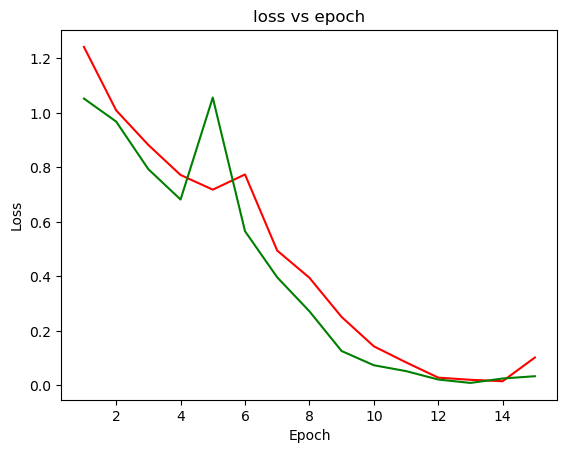

In [7]:
plt.plot(epoch_count, training_loss, 'r')
plt.plot(epoch_count, val_loss, 'g')
plt.title('loss vs epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [8]:
training_acc = history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch_count = range(1, len(training_loss) + 1)

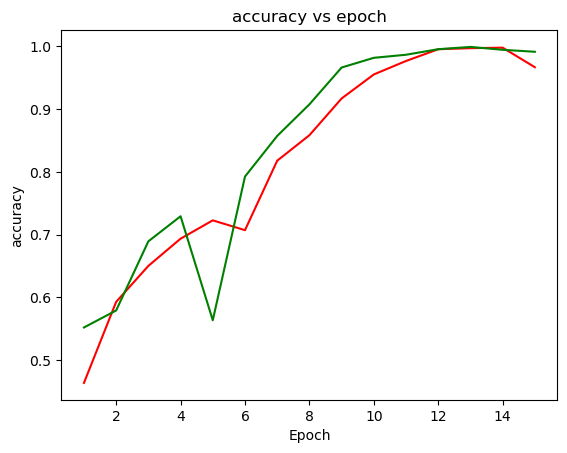

In [9]:
plt.plot(epoch_count, training_acc, 'r')
plt.plot(epoch_count, val_acc, 'g')
plt.title('accuracy vs epoch')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show();